In [42]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Saving diabetes_012_health_indicators_BRFSS2015.csv to diabetes_012_health_indicators_BRFSS2015 (2).csv
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_012_health_indicators_BRFSS2015.csv to diabetes_012_health_indicators_BRFSS2015 (3).csv


In [44]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_binary_health_indicators_BRFSS2015.csv to diabetes_binary_health_indicators_BRFSS2015 (2).csv


In [45]:
import pandas as pd
d1 = pd.read_csv('diabetes_012_health_indicators_BRFSS2015 (2).csv')
d2 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
d3 = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
print("First few rows of d1:")
print(d1.head())
print("\nFirst few rows of d2:")
print(d2.head())
print("\nFirst few rows of d3:")
print(d3.head())

First few rows of d1:
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import os

In [48]:
cdc_df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
output_dir = '/content/drive/MyDrive/DAToutput'
os.makedirs(output_dir, exist_ok=True)
cdc_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


cdc_folder = '/content/drive/MyDrive/cdc'
os.makedirs(cdc_folder, exist_ok=True)
class_counts = cdc_df['Diabetes_binary'].value_counts()


plt.savefig(f"{cdc_folder}/cdc_class_distribution.png")
plt.show()

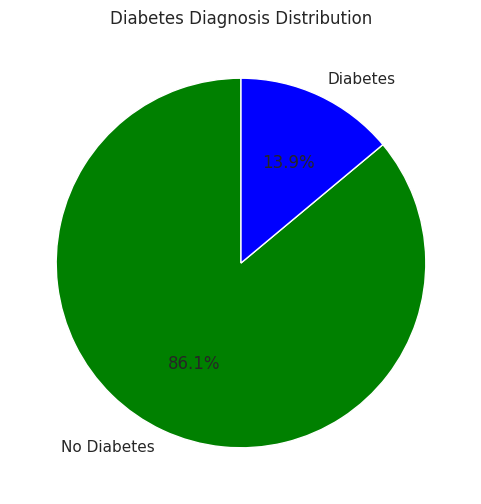

In [55]:
#Class distribution
cdc_folder = '/content/drive/MyDrive/cdc'
os.makedirs(cdc_folder, exist_ok=True)
class_counts = cdc_df['Diabetes_binary'].value_counts()

plt.figure(figsize=(6, 6))
df['Diabetes'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['No Diabetes', 'Diabetes'], colors=['green', 'blue'])
plt.ylabel('')
plt.title("Diabetes Diagnosis Distribution")
plt.savefig(f"{save_path}/01_class_distribution.svg")

plt.savefig(f"{cdc_folder}/cdc_class_distribution.png")
plt.show()

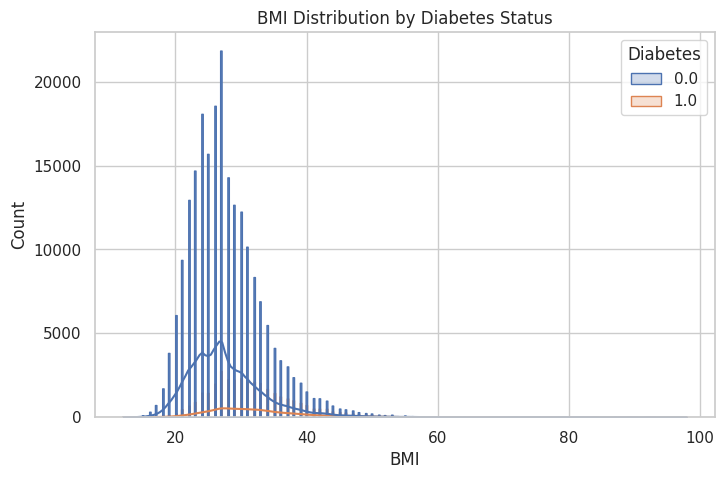

In [54]:
# BMI distribution
cdc_folder = '/content/drive/MyDrive/cdc'
os.makedirs(cdc_folder, exist_ok=True)
class_counts = cdc_df['Diabetes_binary'].value_counts()

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='BMI', hue='Diabetes', element='step', kde=True)
plt.title("BMI Distribution by Diabetes Status")
plt.savefig(f"{save_path}/02_bmi_histogram.svg")

plt.savefig(f"{cdc_folder}/cdc_class_distribution.png")
plt.show()

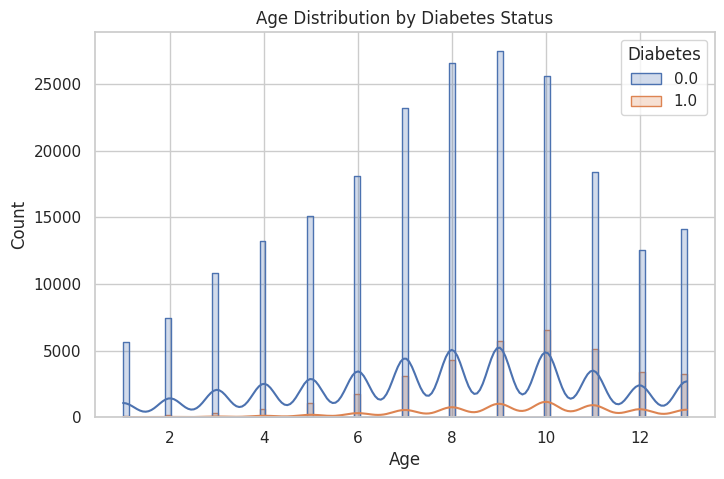

In [63]:
# Age Histogram
cdc_folder = '/content/drive/MyDrive/cdc'
os.makedirs(cdc_folder, exist_ok=True)

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Diabetes', element='step', kde=True)
plt.title("Age Distribution by Diabetes Status")

plt.savefig(f"{cdc_folder}/age_distribution_by_diabetes.png")  # Save as PNG
plt.show()


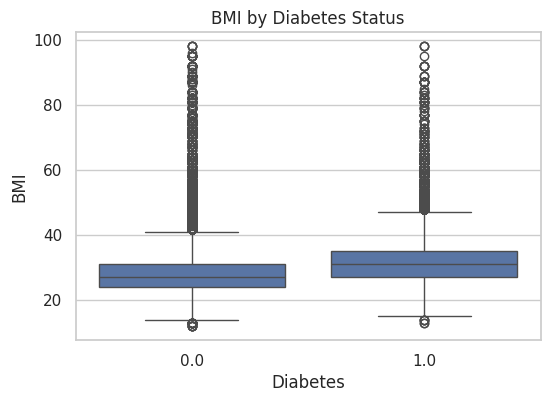

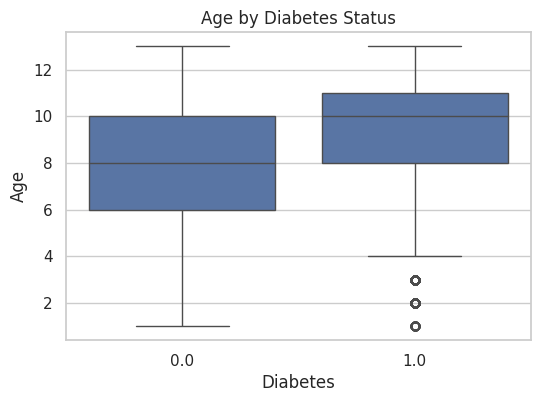

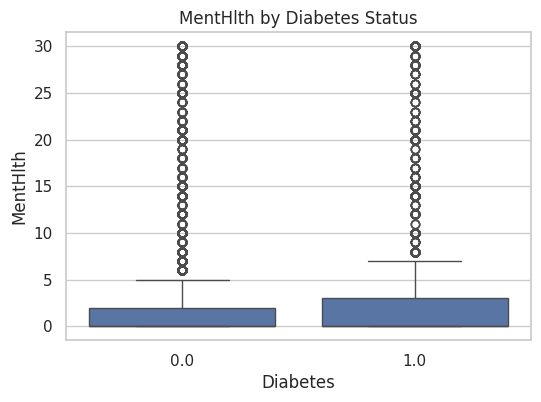

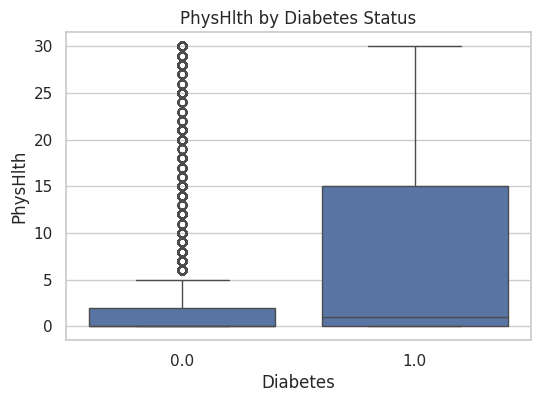

In [69]:
# Boxplot Predictors
cdc_folder = '/content/drive/MyDrive/cdc'
os.makedirs(cdc_folder, exist_ok=True)

for feature in ['BMI', 'Age', 'MentHlth', 'PhysHlth']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Diabetes', y=feature, data=df)
    plt.title(f'{feature} by Diabetes Status')

    plt.savefig(f"{cdc_folder}/boxplot_{feature.lower()}.png")

    plt.show()

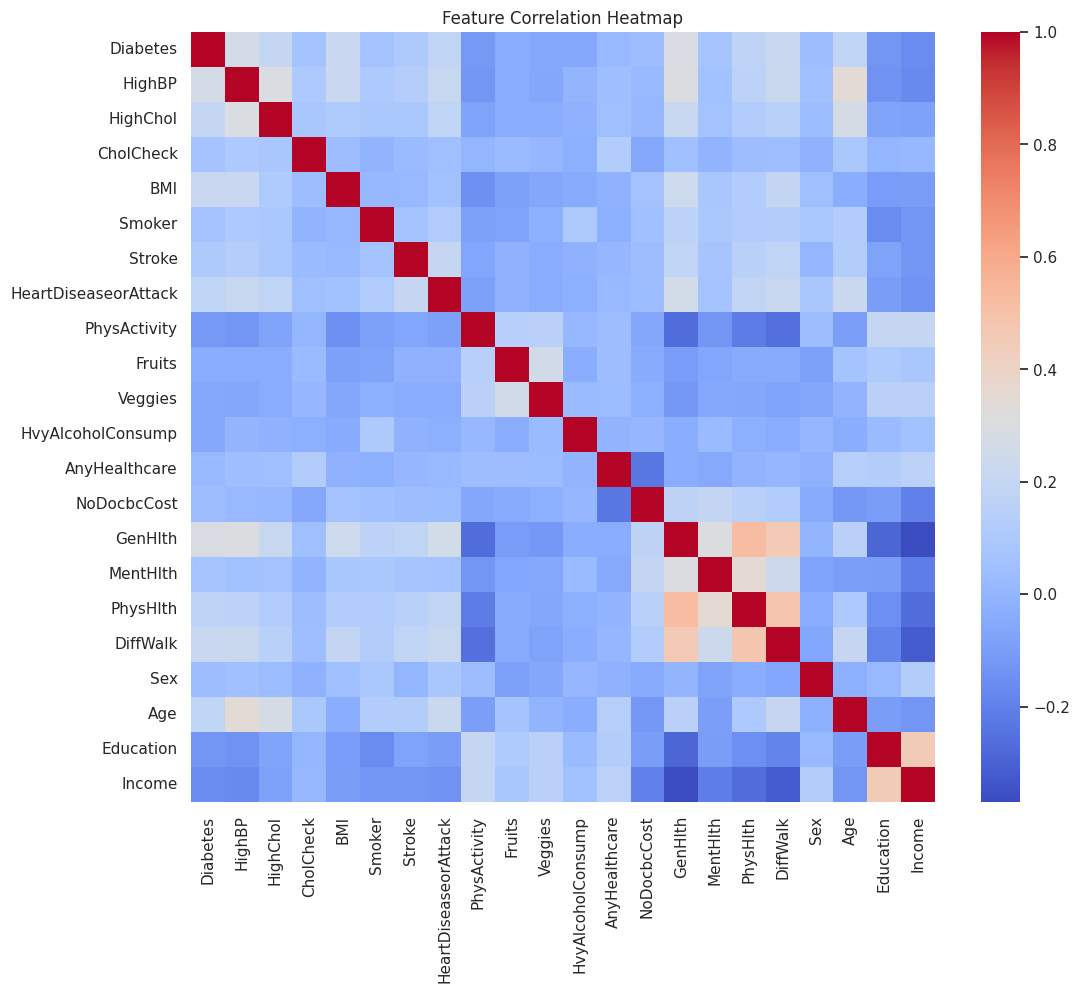

<Figure size 640x480 with 0 Axes>

In [70]:
# Correrlation heatmap
cdc_folder = '/content/drive/MyDrive/cdc'
os.makedirs(cdc_folder, exist_ok=True)

plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.savefig(f"{save_path}/05_correlation_heatmap.svg")
plt.show()

plt.savefig(f"{cdc_folder}/boxplot_{feature.lower()}.png")
plt.show()

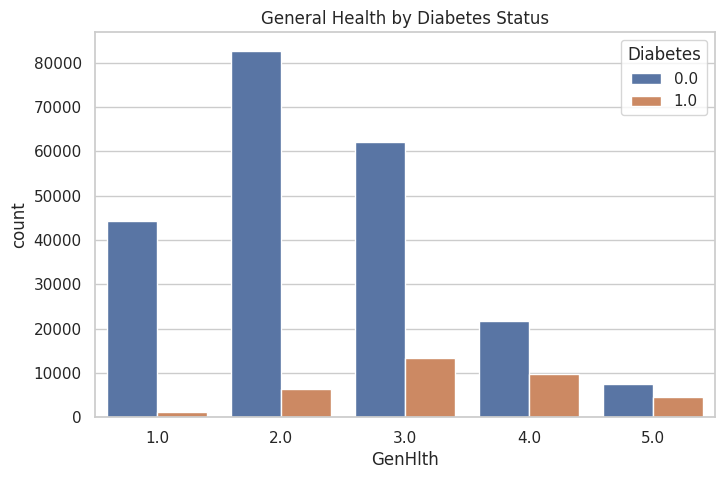

<Figure size 640x480 with 0 Axes>

In [71]:
# Gen health - diabetes
cdc_folder = '/content/drive/MyDrive/cdc'
os.makedirs(cdc_folder, exist_ok=True)
class_counts = cdc_df['Diabetes_binary'].value_counts()

plt.figure(figsize=(8, 5))
sns.countplot(x='GenHlth', hue='Diabetes', data=df)
plt.title("General Health by Diabetes Status")
plt.savefig(f"{save_path}/06_genhlth_diabetes.svg")
plt.show()

plt.savefig(f"{cdc_folder}/cdc_class_distribution.png")
plt.show()

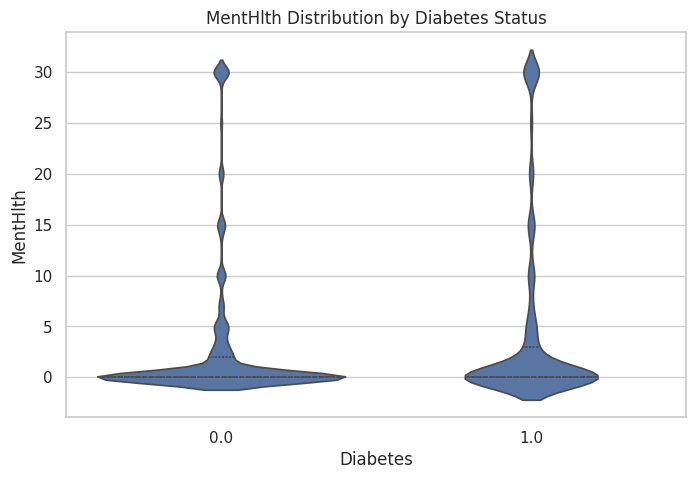

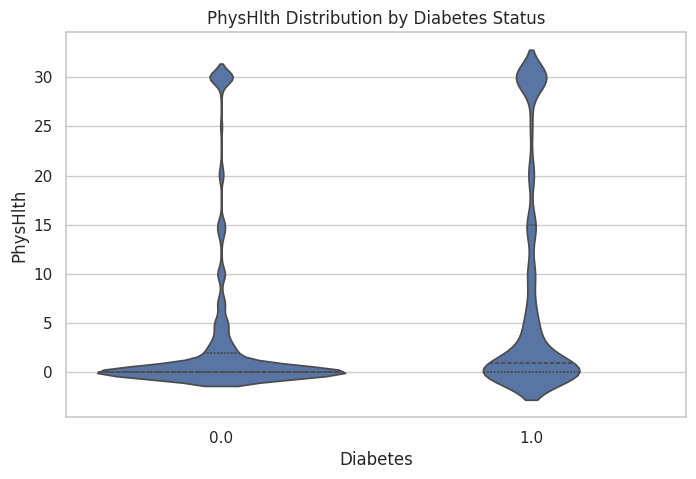

<Figure size 640x480 with 0 Axes>

In [72]:
# mental - physical health
cdc_folder = '/content/drive/MyDrive/cdc'
os.makedirs(cdc_folder, exist_ok=True)
class_counts = cdc_df['Diabetes_binary'].value_counts()

for feature in ['MentHlth', 'PhysHlth']:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='Diabetes', y=feature, data=df, inner='quartile')
    plt.title(f"{feature} Distribution by Diabetes Status")
    plt.savefig(f"{save_path}/07_{feature.lower()}_violin.svg")
    plt.show()

plt.savefig(f"{cdc_folder}/cdc_class_distribution.png")
plt.show()

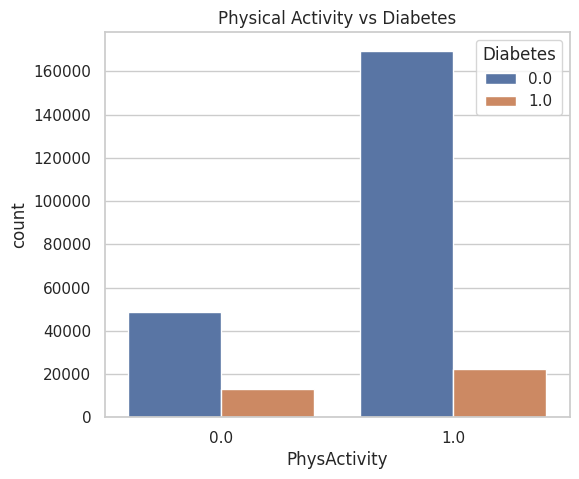

<Figure size 640x480 with 0 Axes>

In [73]:
# physical health and diabetes
cdc_folder = '/content/drive/MyDrive/cdc'
os.makedirs(cdc_folder, exist_ok=True)
class_counts = cdc_df['Diabetes_binary'].value_counts()

plt.figure(figsize=(6, 5))
sns.countplot(x='PhysActivity', hue='Diabetes', data=df)
plt.title("Physical Activity vs Diabetes")
plt.savefig(f"{save_path}/08_physactivity.svg")
plt.show()

plt.savefig(f"{cdc_folder}/cdc_class_distribution.png")
plt.show()

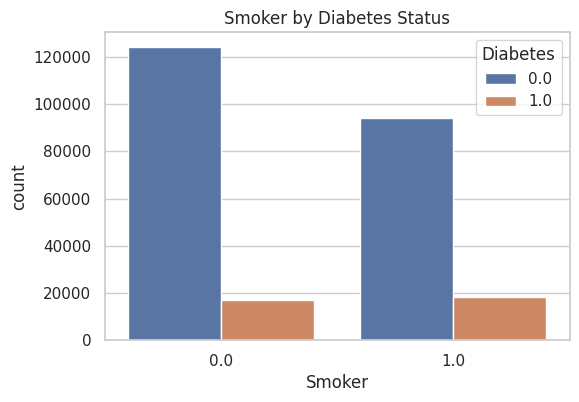

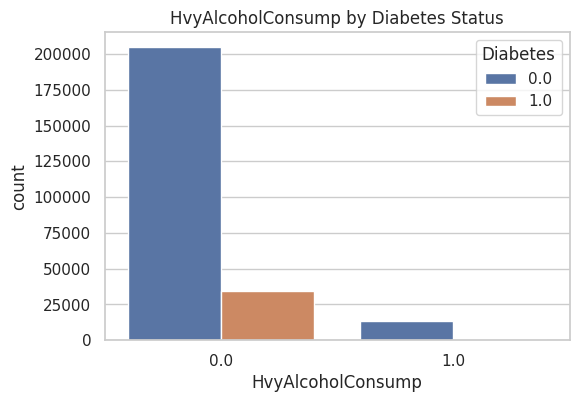

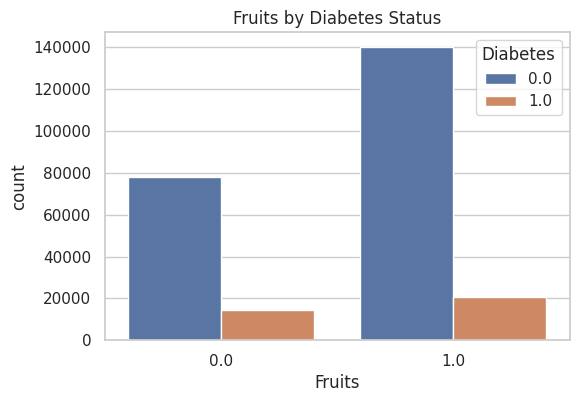

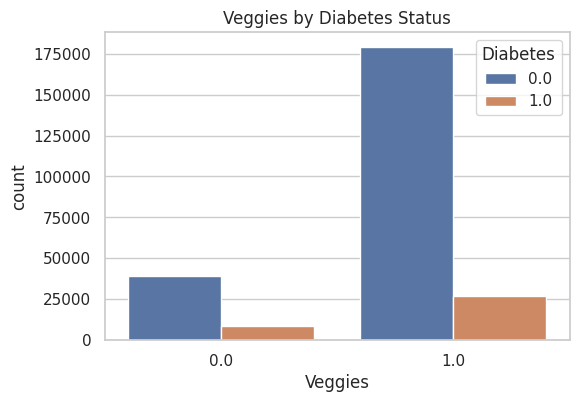

<Figure size 640x480 with 0 Axes>

In [74]:
# life style
cdc_folder = '/content/drive/MyDrive/cdc'
os.makedirs(cdc_folder, exist_ok=True)
class_counts = cdc_df['Diabetes_binary'].value_counts()

for col in ['Smoker', 'HvyAlcoholConsump', 'Fruits', 'Veggies']:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Diabetes', data=df)
    plt.title(f"{col} by Diabetes Status")
    plt.savefig(f"{save_path}/09_lifestyle_{col.lower()}.svg")
    plt.show()

plt.savefig(f"{cdc_folder}/cdc_class_distribution.png")
plt.show()

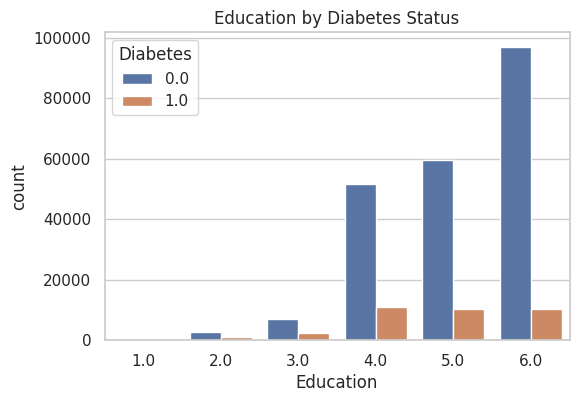

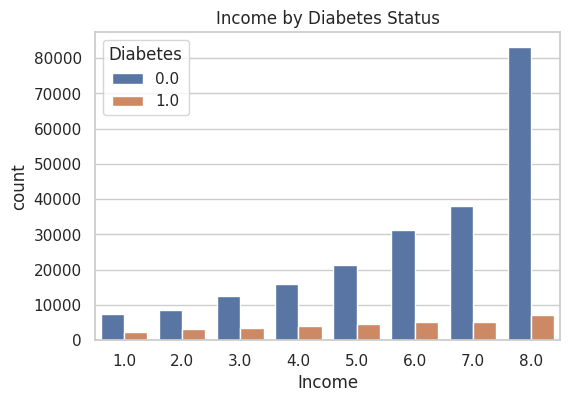

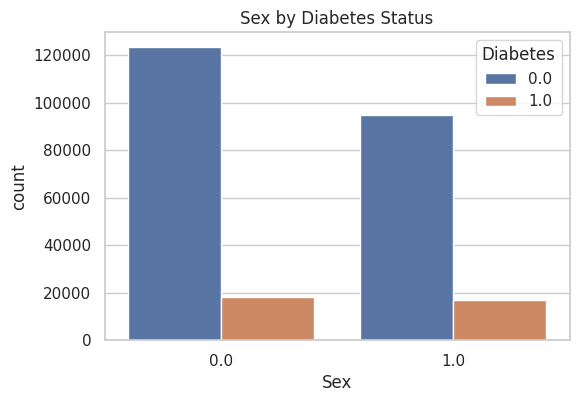

<Figure size 640x480 with 0 Axes>

In [75]:
# education, income, sex
cdc_folder = '/content/drive/MyDrive/cdc'
os.makedirs(cdc_folder, exist_ok=True)
class_counts = cdc_df['Diabetes_binary'].value_counts()

for col in ['Education', 'Income', 'Sex']:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Diabetes', data=df)
    plt.title(f"{col} by Diabetes Status")
    plt.savefig(f"{save_path}/10_demo_{col.lower()}.svg")
    plt.show()

plt.savefig(f"{cdc_folder}/cdc_class_distribution.png")
plt.show()